# Dog Breeds competition

Who's a good dog? Who likes ear scratches? Well, it seems those fancy deep neural networks don't have all the answers. However, maybe they can answer that ubiquitous question we all ask when meeting a four-legged stranger: what kind of good pup is that?

In this playground competition, you are provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well you can tell your Norfolk Terriers from your Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated.

In [20]:
# importing libraries

import mxnet as mx

mx.__version__

'0.12.0'

### Downloading dataset
used the kaggle cli to download the dataset using

```
 kg download -u < username > -p < password> -c dog-breed-identification
```

### unzip the files

```
%%bash

cd ~/data/dogbreeds/
unzip -q labels.csv.zip  
unzip -q sample_submission.csv.zip
unzip -q test.zip
unzip -q train.zip
rm -rf labels.csv.zip sample_submission.csv.zip test.zip train.zip
```

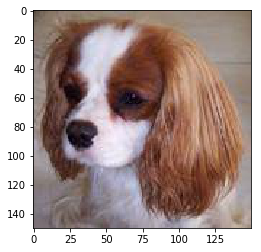

(150, 150, 3)


In [21]:
import matplotlib.pyplot as plt

img = mx.image.imdecode(open('/home/ubuntu/data/dogbreeds/train/ab23707f7d469c51b198ef69e75c990e.jpg', 'rb').read())
plt.imshow(img.asnumpy()); plt.show()
print(img.shape)

In [22]:
%%bash

python ~/im2rec.py --list True --recursive True train /data/dogbreeds/train/


In [23]:
import pandas as pd

df_label = pd.read_csv("~/data/dogbreeds/labels.csv")
df_label.columns = ['fname','label']
df_label['fname'] = df_label['fname']+'.jpg'
df_label
df_list = pd.read_csv("~/train.lst",sep='\t',names = ['num','label','fname'])
df_list

df_merge = df_label.merge(df_list,on='fname')

new_df = df_merge[['label_x','fname']]
new_df

new_df.to_csv('merge_train.lst',header=False,sep='\t')

In [60]:
df_lab = df_label[["label"]]
df_dict = df_lab.to_dict
print(df_dict)

<bound method DataFrame.to_dict of                              label
0                      boston_bull
1                            dingo
2                         pekinese
3                         bluetick
4                 golden_retriever
5               bedlington_terrier
6               bedlington_terrier
7                           borzoi
8                          basenji
9               scottish_deerhound
10               shetland_sheepdog
11                    walker_hound
12                     maltese_dog
13                        bluetick
14                 norfolk_terrier
15             african_hunting_dog
16         wire-haired_fox_terrier
17                         redbone
18                lakeland_terrier
19                           boxer
20                        doberman
21                      otterhound
22                      otterhound
23              bedlington_terrier
24                           dingo
25                golden_retriever
26              stan

# Using mxnet iterator

In [25]:
data_iter = mx.image.ImageIter(path_imglist='/home/ubuntu/kagglecompetitions/merge_train.lst',data_shape = (150,150,3),batch_size = 32)

ValueError: could not convert string to float: 'boston_bull'

Lets try pytorch and see how it works with it using the example that Jeremy gave

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
import sys
sys.path.insert(0,"/home/ubuntu/fastai/")
from fastai.imports import *

In [9]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [17]:
PATH = "/home/ubuntu/data/dogbreeds/"
sz = 224

In [33]:
idx = len(list(open(PATH+"labels.csv")))-1
val_idx = get_cv_idxs(idx)

In [61]:
arch=resnext101_64
tfms = tfms_from_model(arch,sz,aug_tfms = transforms_side_on,max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train',csv_fname = PATH + 'labels.csv',bs=64,test_name = 'test',val_idxs=val_idx,suffix='.jpg',tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 10)

A Jupyter Widget

[ 0.       0.94693  0.37202  0.91198]                        
[ 1.       0.42476  0.26991  0.93154]                        
[ 2.       0.2855   0.24377  0.92913]                        
[ 3.       0.23051  0.22963  0.92816]                        
[ 4.       0.18508  0.21932  0.93597]                        
[ 5.       0.15445  0.21779  0.9306 ]                        
[ 6.       0.13167  0.21929  0.93304]                        
[ 7.       0.11494  0.2123   0.93548]                        
[ 8.       0.09616  0.20855  0.93499]                         
[ 9.       0.08663  0.2064   0.93499]                         



In [31]:
get_cv_idxs?